# 1 - DEFINE THE PROBLEM

In [1]:
# The goal of this project is to predict whether a passenger survived the Titanic disaster.
# We will use demographic and ticket information from the passengers to build a classification model.

# 2 - IMPORT REQUIRED LIBRARIES

## 2.1 - Base Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 - ML/DL Libraries

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# 3 - LOAD THE DATA

In [8]:
data = pd.read_csv('../datasets/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4 - EDA (Exploratory Data Analysis)

In [10]:
data.shape

(891, 12)

In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Basic structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Categorical summary
data.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# 5 - VISUALIZE THE DATA

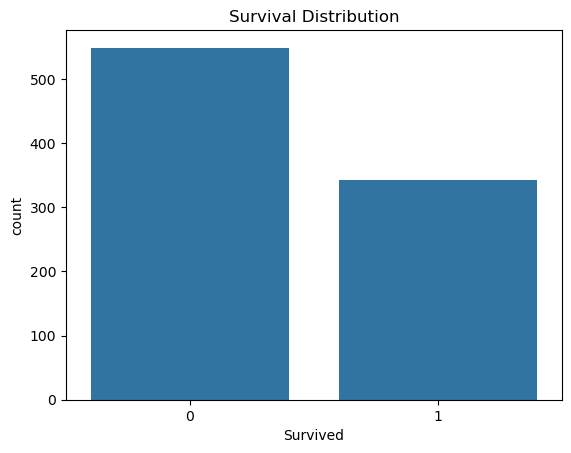

In [9]:
# Distribution of target variable
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

In [10]:
# Distribution by Sex and Pclass

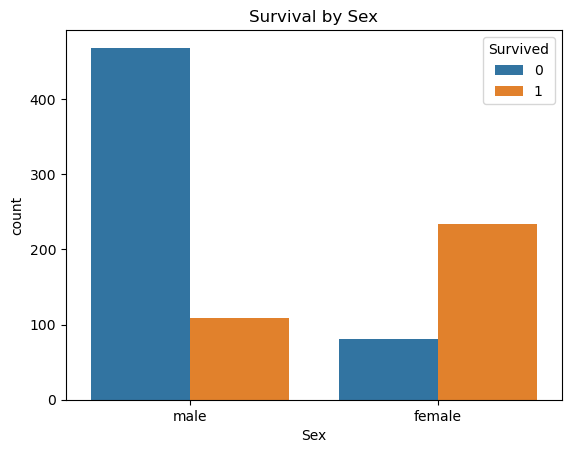

In [11]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')
plt.show()

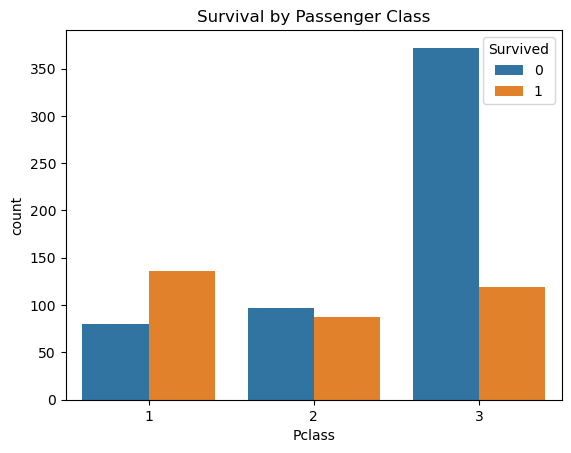

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

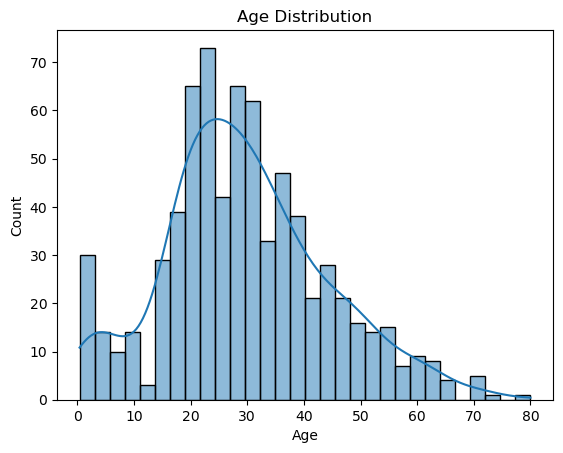

In [13]:
# Age distribution
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

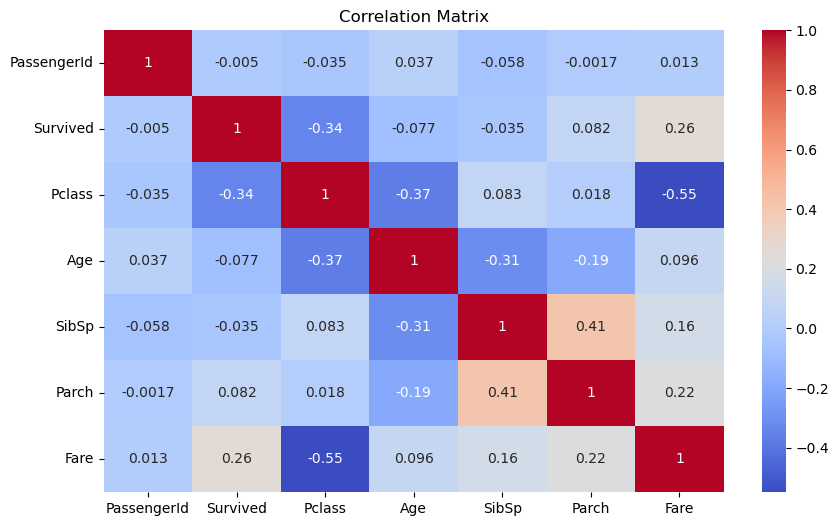

In [14]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6 - PREPROCESS THE DATA

In [15]:
# Define features and target
# Drop non-informative or redundant columns
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [16]:
# Define column groups
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

In [17]:
# Define individual transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # no 'sparse' ni 'sparse_output'
])

In [18]:
# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [19]:
# Fit and transform (optional preview)
X_prepared = preprocessor.fit_transform(X)
print(f'✅ Preprocessing complete. Output shape: {X_prepared.shape}')

✅ Preprocessing complete. Output shape: (891, 10)


# 7 - SPLIT THE DATA

In [20]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42
)

print(f'Train shape: {X_train.shape} | Test shape: {X_test.shape}')

Train shape: (712, 10) | Test shape: (179, 10)


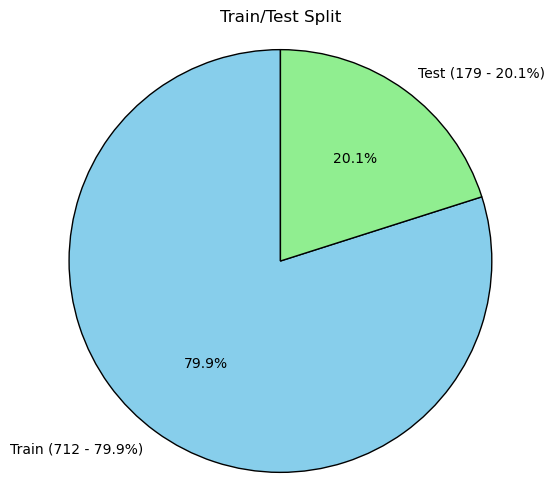

In [21]:
# Visual Pie Chart of the Split
total = len(data)
train_rows, test_rows = len(X_train), len(X_test)

labels = [
    f'Train ({train_rows} - {100*train_rows/total:.1f}%)',
    f'Test ({test_rows} - {100*test_rows/total:.1f}%)'
]

plt.figure(figsize=(6, 6))
plt.pie(
    [train_rows, test_rows],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Train/Test Split')
plt.axis('equal')
plt.show()